<a href="https://colab.research.google.com/github/SirajShaikh96/Global-Terrorism-Analysis-/blob/main/Zomato_segment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restuarant Clustering & Sentiment Analysis


##### **Project Type**    - EDA/Clustering & Sentiment Analysis/UnSupervised & Supervised
##### **Contribution**    - Individual
##### **Project By -** Siraj Shaikh


# **Project Summary -**

**This project is about Zomato. It is a restuarant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restuarant and also food delivery options from partner restuarant in selected cities.**

#**The project focuses on Customer and Company, by clustering the restuarant on cuisine and cost vs benefits and finding out top critics in the industry will help restuarant, so they can colaborate with critics and promote their restuarant on Zomato and on Social media. Understanding the sentiment of review's will help Zomato, SO they can improve their Business in terms of serviec and operations.**

**First check if data has null value or there is a need to make new features, remove the features not required.**

**Then data will go thhrough ML pipeline like data preprocessing,making dummie features, defining independent variable and dependent variable, splitting data for training and testing using train_test_split module. Then i will use Elbow methos and silhuoette score to know the optimal number of clusters then we'll apply first Unsupervised model KMeans Clustering on the traning data after model get and model will predict the unseen data.Then we'll we apply second model Hierarchical clustering.**

**The next step is use NLP on reviews, remove punctuations and stopwords and trough CounterVectorization method make matrix of words, defining independent variable and dependent variable, splitting data for training and testing using train_test_split module, train t the ML model. After training data the prediction will be compare on testing data to evaluate the Classification Report of model and also other parameter. This model will help business to understand the sentiment of reviews.**

# **GitHub Link -** 



# **Problem Statement**


**Modern India is warming up to the idea of eating restuarant food whether by dining outside or getting food delivered.**

#### **Business Objective?**

**To make a robust machine learning model ,so it can show best cuisine to the customer, so customer can avail better cost vs benefit. It will also help the the business to understand the sentiment of the customers.**

In [155]:
#Importing Libraries 
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn

import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns; sns.set(color_codes=True)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Now let's work with main dataset df1 which contain's valuable inforamation, which will help customer while ordering food from Zomato.

In [2]:
#Loading Dataset
file_path = '/content/drive/MyDrive/ML_Capstone_project/zomato/Zomato Restaurant names and Metadata.csv'

In [3]:
# accessing above dataset in pd and storing it in variable df1
df1 = pd.read_csv(file_path)

In [4]:
#First 5 rows of the dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#shape of the dataset
df1.shape


(105, 6)

In [6]:
#check info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


**Before proceeding for data wrangling let's first convert numerical string values into int type**

In [7]:
#run for loop & Split all rows of cost by coma and appending list in an empty list called cost
cost= []
for k in df1.Cost:
  h = k.split(",")
  cost.append(h)

In [8]:
# print cost 
cost[:5]

[['800'], ['800'], ['1', '300'], ['800'], ['1', '200']]

**Now we have to add those list of list which len is 2 to make it actaul cost**





In [9]:
#run for loop on cost and add 
f_d = []
for i in cost:
  if len(i)==2: 
    sum =  i[0] + i[1]  # if len of a list is 2 than add it 
    f_d.append(int(sum)) #after adding conveting the string into int and appending it in list f_d
  else:
    sum =  int(i[0]) + 0 #if len of a list is not 2 than add it whit 0, but first convert the srt in int form
    f_d.append(int(sum)) #appending it in list f_d

In [10]:
#print f_d to see price is corrected or not
f_d[:6]

[800, 800, 1300, 800, 1200, 1500]

#Finally we've converted the cost in int type, it will be very in further process.

#make a new feature cost and store the value of f_d

In [11]:
#Converting Cost column in float type
df1['Cost'] = f_d

In [12]:
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


**As links and Timing of restuarant does not gives much valuable info, so we will drop it.**

In [13]:
df1.drop(columns=['Links','Timings'],inplace=True)

In [14]:
#desbribe
df1.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


#Let's find out most expensive Restuarant in the dataset.

In [15]:
#groupby Name on cost and value_counts to find the most expensive restuarant and sorting them in descending
most_expensive_res = df1.groupby('Name')['Cost'].sum().sort_values(ascending=False)

In [16]:
#first 10 restuarant
most_expensive_res[:10]

Name
Collage - Hyatt Hyderabad Gachibowli                 2800
Feast - Sheraton Hyderabad Hotel                     2500
10 Downing Street                                    1900
Jonathan's Kitchen - Holiday Inn Express & Suites    1900
Cascade - Radisson Hyderabad Hitec City              1800
Zega - Sheraton Hyderabad Hotel                      1750
Republic Of Noodles - Lemon Tree Hotel               1700
Mazzo - Marriott Executive Apartments                1700
Barbeque Nation                                      1600
Arena Eleven                                         1600
Name: Cost, dtype: int64

Text(0.5, 0, 'Retsuarant')

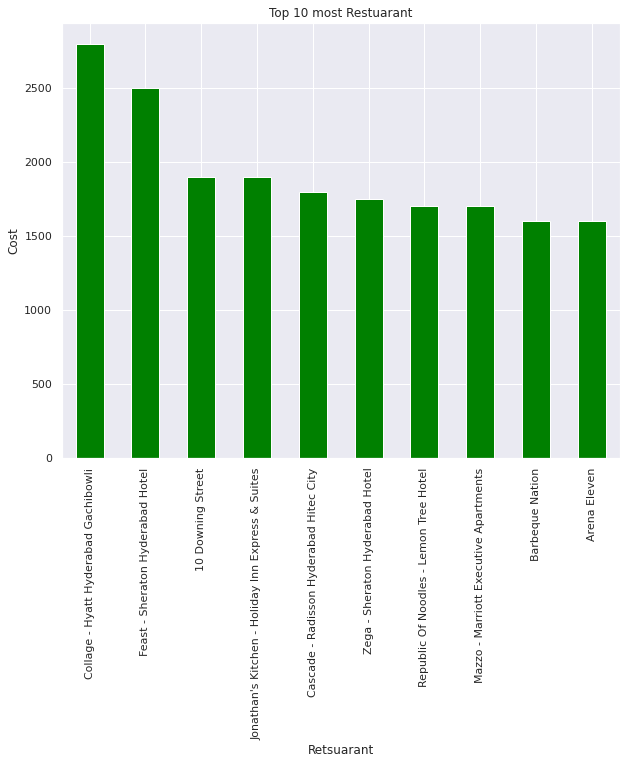

In [17]:
plt.rcParams['figure.figsize'] = [10,8]
most_expensive_res[:10].sort_values(ascending=False).plot(kind='bar', color=['green'])

plt.title('Top 10 most Restuarant')
plt.ylabel('Cost')
plt.xlabel('Retsuarant')

**Collage - Hyatt Hyderabad Gachibowli,Feast - Sheraton Hyderabad Hotel, 10 Downing Street, Jonathan's Kitchen - Holiday Inn Express & Suites, Cascade - Radisson Hyderabad Hitec City, Zega - Sheraton Hyderabad Hotel, Republic Of Noodles - Lemon Tree Hotel, Mazzo - Marriott Executive Apartments', 'Barbeque Nation, Arena Eleven are the most expensive restuarant**

**Let's find out least expensive Restuarant**

In [18]:
#groupby Name on cost and value_counts to find the most expensive restuarant and sorting them.
least_expensive_res = df1.groupby('Name')['Cost'].sum().sort_values()

In [19]:
#first 10 least expensive restuarant
least_expensive_res[:10]

Name
Mohammedia Shawarma         150
Amul                        150
Sweet Basket                200
KS Bakers                   200
Momos Delight               200
Hunger Maggi Point          200
Asian Meal Box              200
Wich Please                 250
Shah Ghouse Spl Shawarma    300
Tempteys                    350
Name: Cost, dtype: int64

Text(0.5, 0, 'Restuarant')

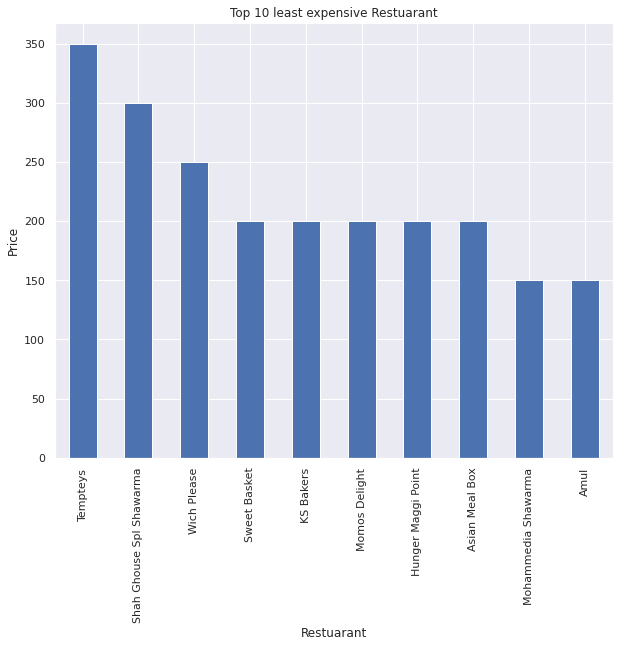

In [20]:
#plot 10 least expensive restuarant
plt.rcParams['figure.figsize'] = [10,8]
least_expensive_res[:10].sort_values(ascending=False).plot(kind='bar')

plt.title('Top 10 least expensive Restuarant')
plt.ylabel('Price')
plt.xlabel('Restuarant')

**Mohammedia Shawarma, Amul, Sweet Basket, KS Bakers, Momos Delight, Hunger Maggi Point, Asian Meal Box, Wich Please, Shah Ghouse Spl Shawarma, Tempteys are least expensinve restuarants**

In [21]:
df1.head()

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


#Let's find out most served cuisines.

In [22]:
# spliting the cusines and storing in list
cuisine_list=df1.Cuisines.str.split(', ')
cuisine_list


0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

#Make a dictionary, store cuisine name as key and it's count as value.

In [23]:
# storing all the cusines in a dict
cuis_dict = {}
for names in cuisine_list:
  for name in names:
    if (name in cuis_dict):
      cuis_dict[name]+=1
    else:
      cuis_dict[name]=1

In [24]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

In [25]:
#first five rows of cuis_df
cuis_df.head()

,Cuisine,Number of Restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,9


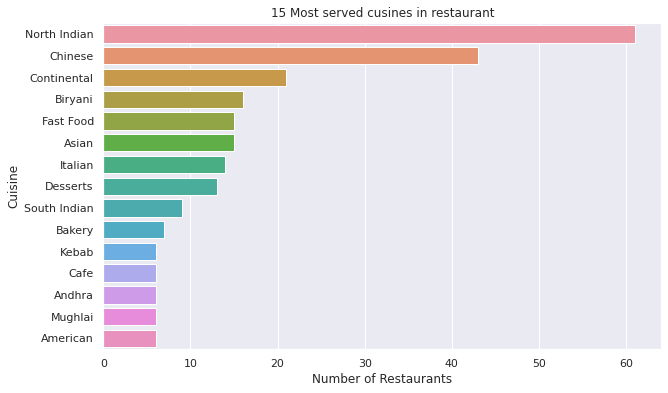

In [26]:
# graph for most cusines served in restaurant
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]
sns.barplot(y='Cuisine',x="Number of Restaurants",data=cuis_df,order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()

#North Indian,Chinese, Continental, Biryani ,Fast Food, Asian, Italian, Desserts, South Indian, Bakery, Kebab, Cafe, Andhra, Mughlai, American are most served cuisines in the restuarant.

#Let's find out most used Tags for restuarant. Tag indicates the category of restuarant.

In [27]:
# spliting the cusines and storing in list
Collections_list=df1.Collections.dropna().str.split(', ')
Collections_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [28]:
# storing all the cusines in a dict. Collections as key and it's count as value
Collections_dict = {}
for names in Collections_list:
  for name in names:
    if (name in Collections_dict):
      Collections_dict[name]+=1
    else:
      Collections_dict[name]=1 

In [29]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs',0:'Number of Restaurants'})

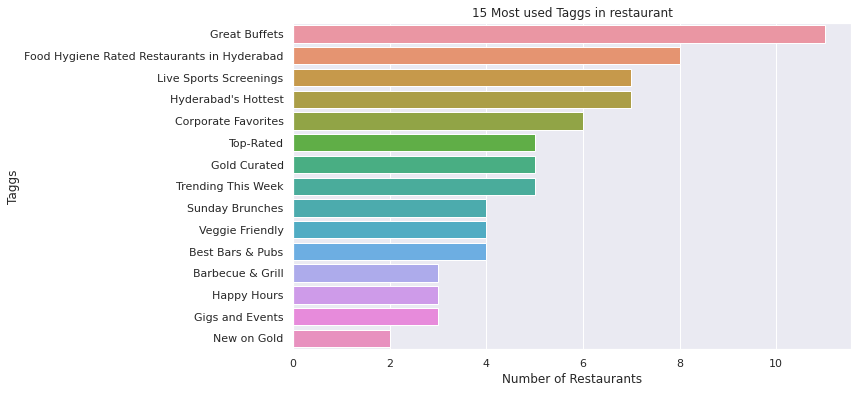

In [30]:
# graph for most cusines served in restaurant\n",
sns.barplot(y='Taggs', x="Number of Restaurants", data=Collections_df, order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:15])
plt.title('15 Most used Taggs in restaurant')
plt.show()

#lets make a feature expensive rating,  how expensive restuarant is.

In [31]:
df1['Cuisines'] = df1['Cuisines'].apply(lambda x : x.lower())

In [32]:
cuisine_df=df1.loc[:,['Name','Cost','Cuisines']]

In [33]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


#Make as function which split the cuisine by coma and return list.

In [34]:
# spliting the cuisine and storing in list
def cuisine_list(cuisines):
  all_cuisines = list(set(cuisines.split(', ')))
  return all_cuisines

In [35]:
#Apply above function
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [36]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[kebab, chinese, north indian, continental, eu..."
1,Paradise,800,"biryani, north indian, chinese","[north indian, chinese, biryani]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[asian, mediterranean, north indian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[seafood, north indian, chinese, biryani, beve..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[mediterranean, north indian, chinese, asian, ..."


In [37]:
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european


In [38]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [39]:
cuisine_df['cuisine']

0             kebab
0           chinese
0      north indian
0       continental
0          european
           ...     
103       fast food
104       malaysian
104           asian
104         chinese
104            thai
Name: cuisine, Length: 313, dtype: object

# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [40]:
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [41]:
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,fast food
2,spicy food
3,spicy food
4,Healthy food
...,...
308,fast food
309,spicy food
310,spicy food
311,fast food


In [42]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

# Making dummies of superset cuisines

In [43]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [44]:
dum_df.head()

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,1,0
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0


In [45]:
cuisine=list(set(dum_df.columns)-set(['Name','Cost','Cuisines']))

In [46]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

# Made dummies on the basis of cuisine_Dessert, cuisine_spicy food, cuisine_fast food, cuisine_Healthy food

In [47]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [48]:
cluster_data.head()

,Cost,cuisine_fast food,cuisine_spicy food,cuisine_Healthy food,cuisine_Dessert
0,1900,1,2,0,0
1,450,0,1,0,0
2,1100,0,1,2,0
3,1500,0,1,2,0
4,750,1,1,1,0


**This data we'll use for training Unsupervised ML model.** 

In [49]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cost                  105 non-null    int64
 1   cuisine_fast food     105 non-null    uint8
 2   cuisine_spicy food    105 non-null    uint8
 3   cuisine_Healthy food  105 non-null    uint8
 4   cuisine_Dessert       105 non-null    uint8
dtypes: int64(1), uint8(4)
memory usage: 1.4 KB


# Standardizing each of the features in the clusters

In [50]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster_data_sc=sc.fit_transform(cluster_data)
cluster_data_sc[:5]

array([[ 2.04558104,  0.26513915,  0.71969146, -0.79975012, -0.45323567],
       [-0.81035397, -1.12684139, -0.28787658, -0.79975012, -0.45323567],
       [ 0.46989276, -1.12684139, -0.28787658,  1.82442995, -0.45323567],
       [ 1.2577369 , -1.12684139, -0.28787658,  1.82442995, -0.45323567],
       [-0.21947087,  0.26513915, -0.28787658,  0.51233992, -0.45323567]])

# KMEANS Clustering for making clusters.

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [52]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(cluster_data_sc)
  sse.append(km.inertia_)

# Using Elbow Analysis determining optimal clusters"

In [53]:
#finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit_transform(cluster_data_sc)
  cluster_errors.append( clusters.inertia_ )
cluster_errors

[525.0,
 382.26780687385883,
 296.33728585144047,
 255.68914161025867,
 223.6314081652107,
 198.41079052725442,
 185.65718795072394,
 163.74651147619767,
 155.86333670964393,
 141.06117804331106,
 130.18508004788436,
 121.40829913222757,
 115.97087825007895,
 104.53438413981794]

In [54]:
#Converting Cluster number and it's respective cluster errors into dataframe 
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors })
clusters_df[0:9]

,num_clusters,cluster_errors
0,1,525.000000
1,2,382.267807
2,3,296.337286
3,4,255.689142
4,5,223.631408
5,6,198.410791
6,7,185.657188
7,8,163.746511
8,9,155.863337


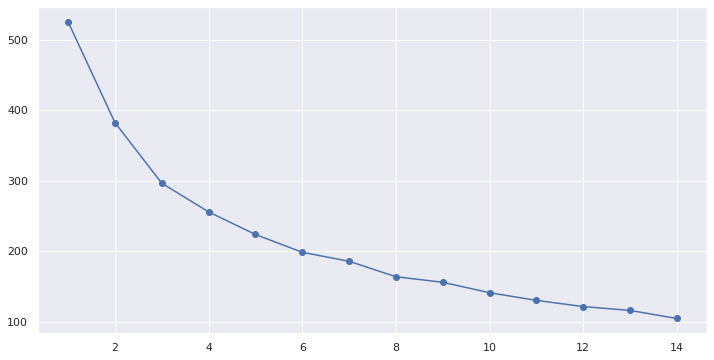

In [55]:
#Plot above data 
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#As we can see that which cluser is optimal is clear. We'll analyze elbow with silhouette score.

In [56]:
#finding best cluster by silhouette score
from sklearn import metrics
k_range = range(2, 9)
scores = []
for k in k_range:
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(cluster_data_sc)
  scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

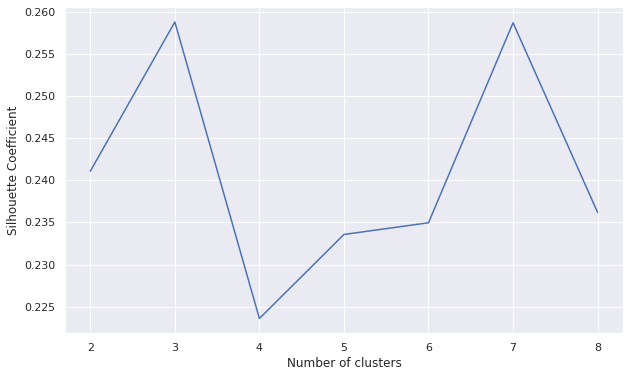

In [57]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

**From above line graph we can see that 3 is the optimal no of cluster in terms of no of clusters and Silhouette Coefficient.**

In [58]:
#Assign training data to variable X
X=cluster_data_sc

**import KMeans cluster from sklearn, select a number random for cluster and train it on data X**

## <b><u> Selecting the number of clusters with silhouette analysis on KMeans clustering </u></b>

### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

### Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2412012067437629
For n_clusters = 3 The average silhouette_score is : 0.25876388277001694
For n_clusters = 4 The average silhouette_score is : 0.25126065470866044
For n_clusters = 5 The average silhouette_score is : 0.2418594421516757
For n_clusters = 6 The average silhouette_score is : 0.23514619139347964
For n_clusters = 7 The average silhouette_score is : 0.2284167800607091
For n_clusters = 8 The average silhouette_score is : 0.2507022892010147
For n_clusters = 9 The average silhouette_score is : 0.26496988200964544
For n_clusters = 10 The average silhouette_score is : 0.2789398584789882


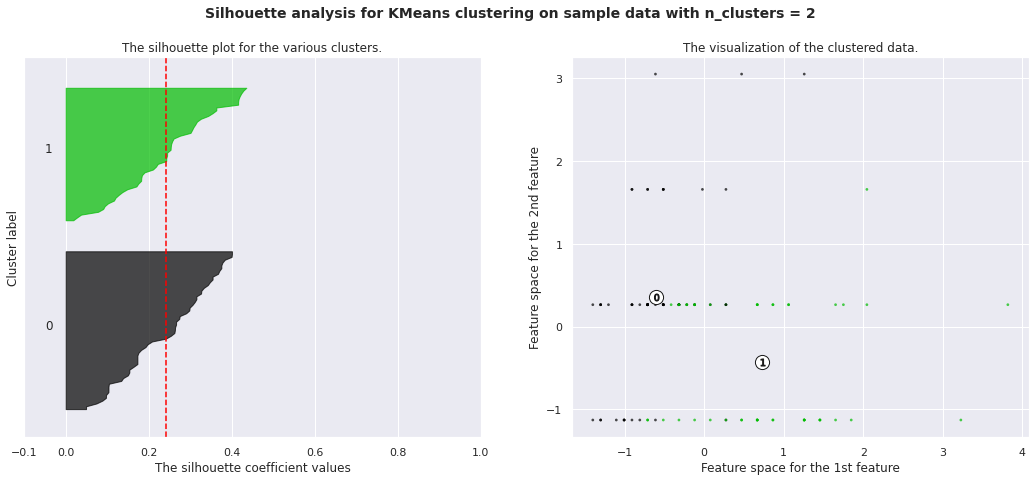

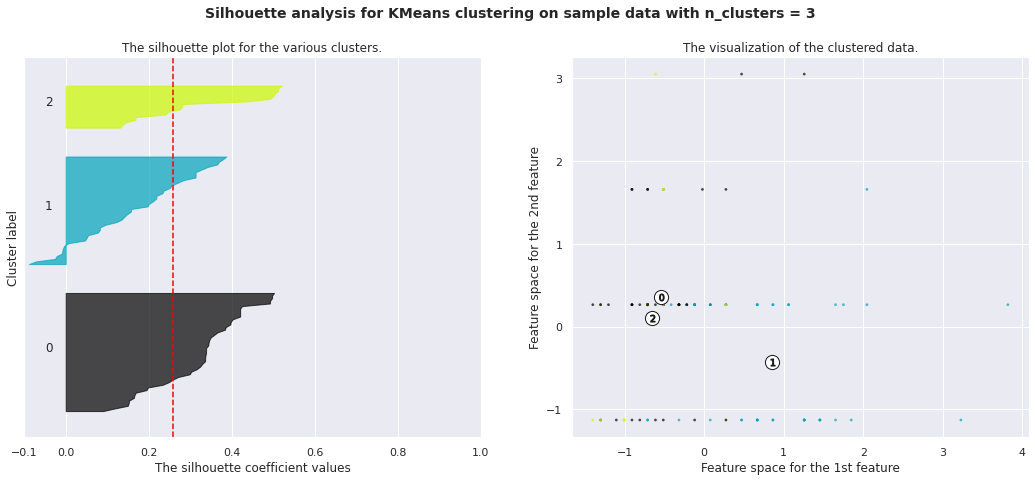

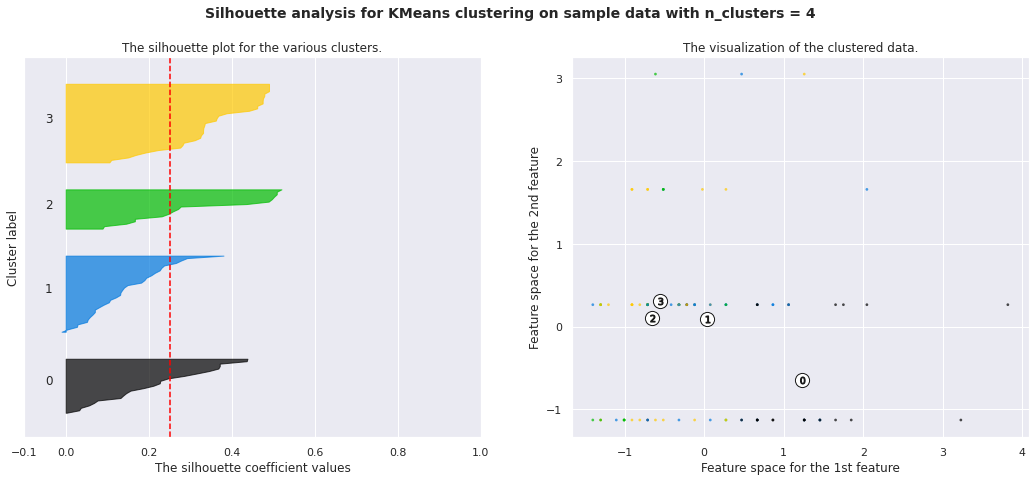

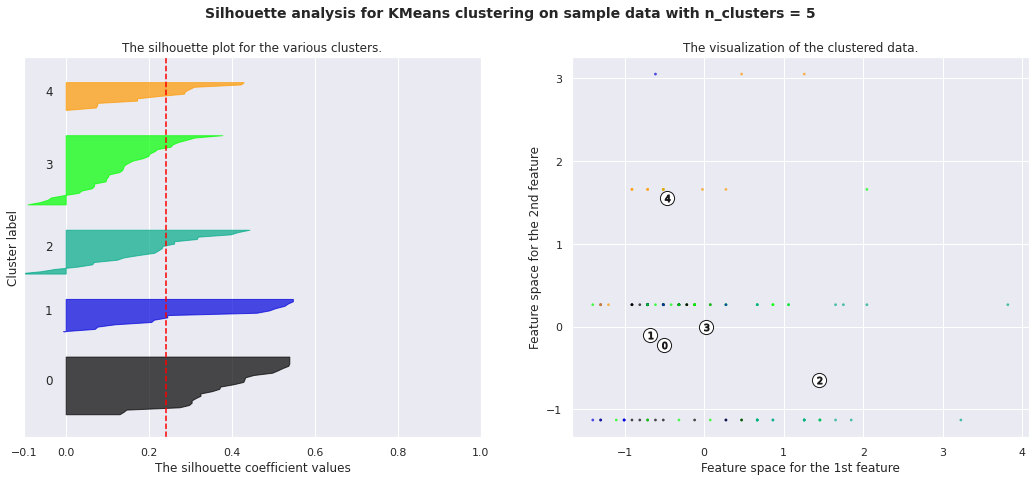

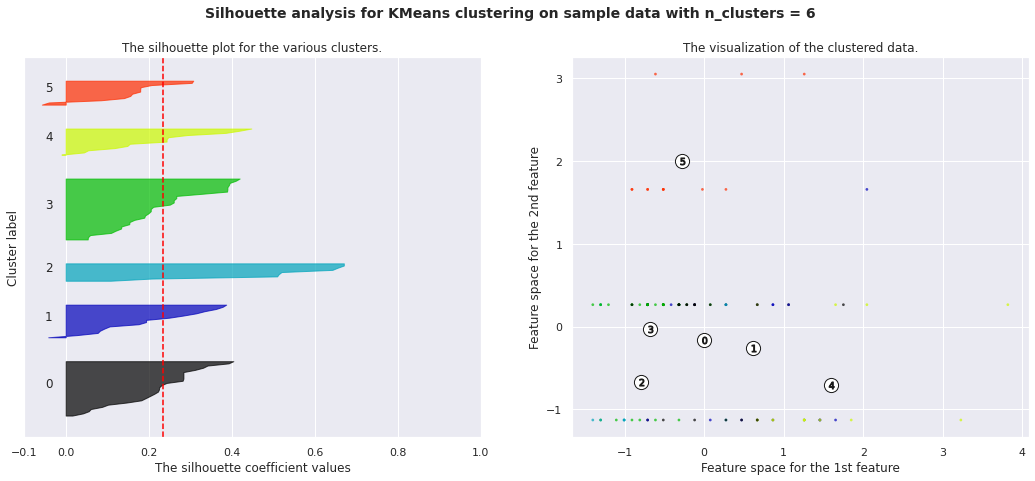

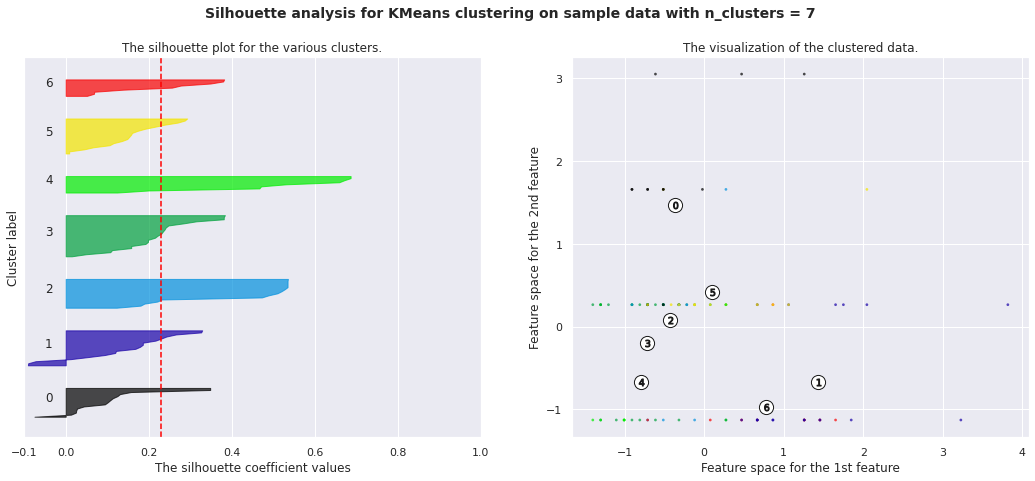

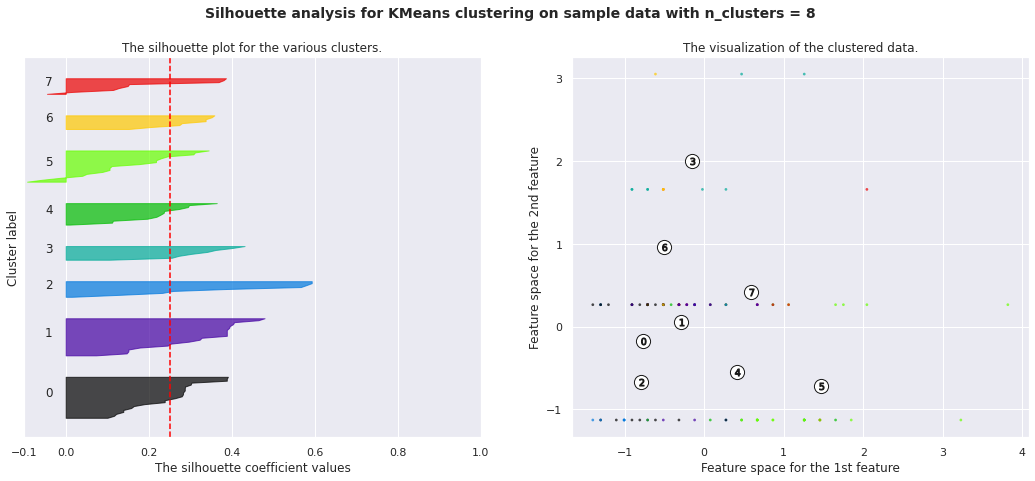

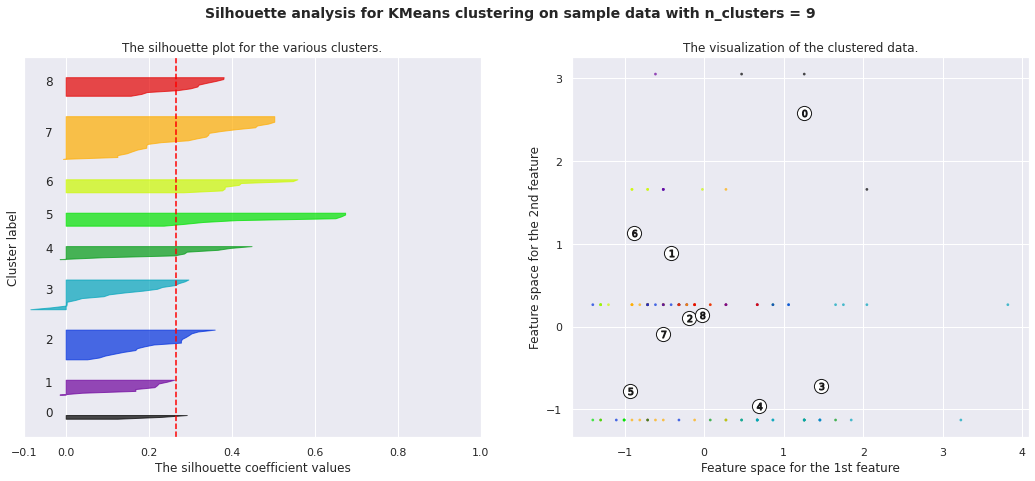

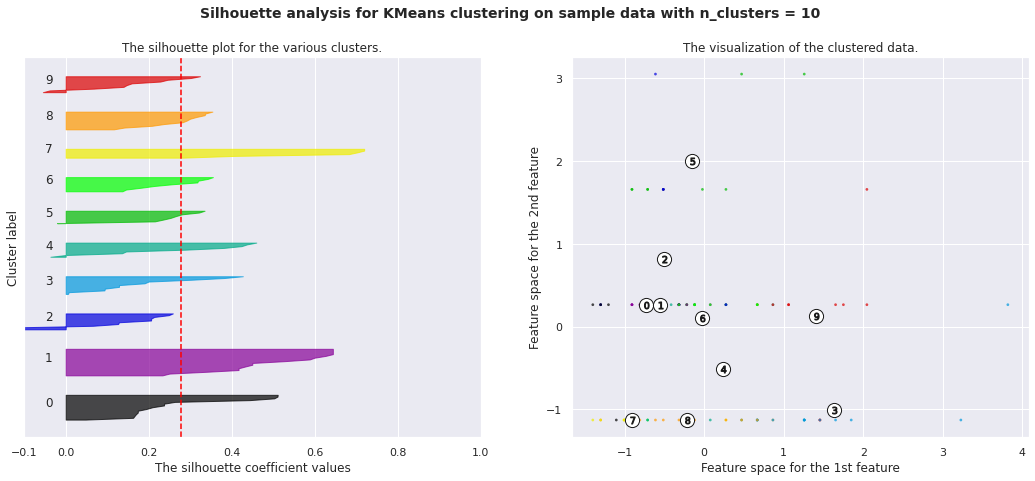

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#according to silhouette score also 3 is the best no of cluster, so let's train our KMeans model to assign data's in to 3 clusters.

In [60]:
# finding the predicted values bu kmeans
km = KMeans(n_clusters=3, n_init=1000, max_iter=500, random_state=1)
y_predicted = km.fit_predict(X)
y_predicted

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [61]:
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [62]:
# updating the cluster values in df
cluster_df['cluster']=y_predicted
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x : x.split(","))
exploded = cluster_df.explode("Cuisines")
exploded.head()

,Name,Cost,Cuisines,cuisine_fast food,cuisine_spicy food,cuisine_Healthy food,cuisine_Dessert,cluster
0,10 Downing Street,1900,north indian,1,2,0,0,2
0,10 Downing Street,1900,chinese,1,2,0,0,2
0,10 Downing Street,1900,continental,1,2,0,0,2
1,13 Dhaba,450,north indian,0,1,0,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,north indian,0,1,2,0,2


In [63]:
#expracting the unique values from diffrent clusters 
exploded[exploded["cluster"]==0]['Cuisines'].unique()

array(['ice cream', ' desserts', 'cafe', ' bakery', ' continental',
       ' fast food', ' beverages', 'desserts', ' cafe', ' burger',
       'fast food', ' biryani', 'bakery', ' north indian', ' mughlai',
       ' juices', ' chinese', ' mithai', 'american', ' wraps'],
      dtype=object)

In [64]:
exploded[exploded["cluster"]==1]['Cuisines'].unique()

array(['north indian', 'continental', ' american', ' chinese', 'american',
       ' fast food', ' salad', ' burger', ' biryani', ' mughlai', 'asian',
       'mughlai', 'chinese', ' seafood', ' asian', ' momos', 'fast food',
       ' pizza', 'burger', ' continental', 'biryani', ' north indian',
       'hyderabadi', ' japanese', ' sushi', 'finger food', ' kebab',
       'arabian', 'south indian', 'street food', ' arabian', 'momos',
       'lebanese', ' andhra', ' thai', 'north eastern'], dtype=object)

In [65]:
exploded[exploded["cluster"]==2]['Cuisines'].unique()

array(['north indian', ' chinese', ' continental', ' mediterranean',
       ' european', 'european', ' north indian', ' seafood', ' biryani',
       ' hyderabadi', 'continental', 'american', 'biryani',
       ' south indian', ' andhra', 'mediterranean', ' kebab', ' bbq',
       'chinese', ' italian', ' asian', ' mughlai', ' beverages',
       'modern indian', 'asian', ' desserts', ' spanish', ' japanese',
       ' salad', ' sushi', 'andhra', 'italian', 'mexican', 'kebab',
       'thai', ' malaysian', ' thai', ' indonesian', 'seafood', ' goan',
       'bbq', ' modern indian', ' finger food', 'healthy food'],
      dtype=object)

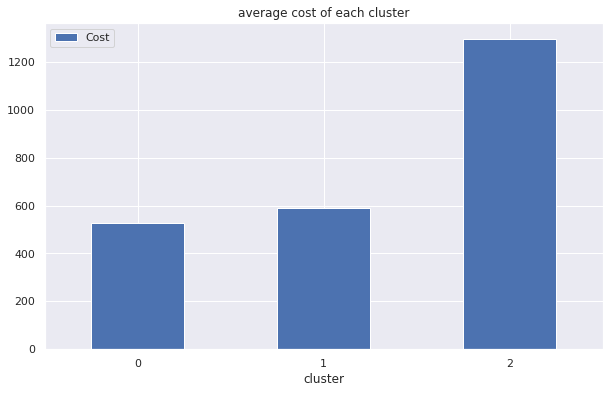

In [66]:
# ploting average cost of each cluster\n",
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()

In [67]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

,Name,Cost,Cuisines,cluster
0,10 Downing Street,1900,"[north indian, chinese, continental]",2
1,13 Dhaba,450,[north indian],1
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",2
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",2
4,Absolute Sizzlers,750,"[continental, american, chinese]",1
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",2
6,American Wild Wings,600,"[american, fast food, salad, burger]",1
7,Amul,150,"[ice cream, desserts]",0
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1
9,Arena Eleven,1600,[continental],2


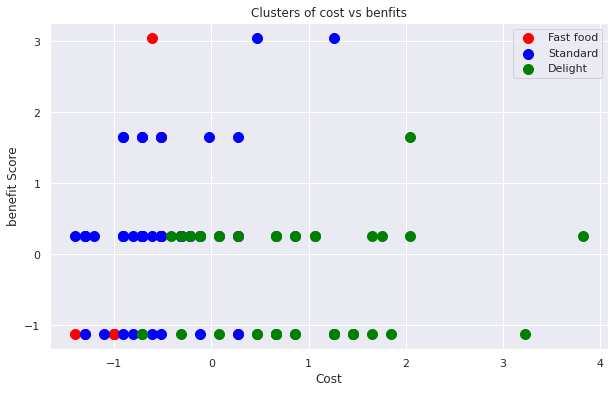

In [68]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_predicted == 0, 0], X[y_predicted == 0, 1], s = 100, c = 'red', label = 'Fast food')
plt.scatter(X[y_predicted == 1, 0], X[y_predicted == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_predicted == 2, 0], X[y_predicted == 2, 1], s = 100, c = 'green', label = 'Delight')
plt.title('Clusters of cost vs benfits')
plt.xlabel('Cost')
plt.ylabel('benefit Score')
plt.legend()
plt.show()

#from above cluster plot we can see that on an average Standard category ahs high cost vs benefit. This cluster will help customer to order cuisine which have high benefit.

# Hierarchical Clustering

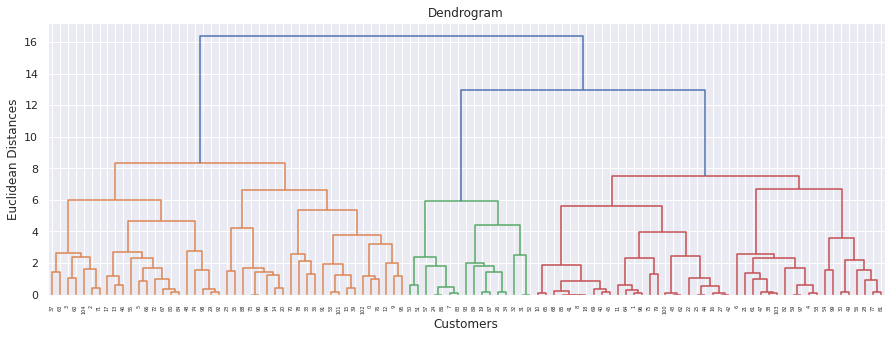

In [69]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [70]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [71]:
# Visualizing the clusters (two dimensions only)
cluster_df['cluster_hr']=y_hc
result=cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]
result.head(20)

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"[north indian, chinese, continental]",2,0
1,13 Dhaba,450,[north indian],1,1
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, mediterranean, european]",2,0
3,AB's - Absolute Barbecues,1500,"[european, mediterranean, north indian]",2,0
4,Absolute Sizzlers,750,"[continental, american, chinese]",1,1
5,Al Saba Restaurant,750,"[north indian, chinese, seafood, biryani, ...",2,0
6,American Wild Wings,600,"[american, fast food, salad, burger]",1,1
7,Amul,150,"[ice cream, desserts]",0,2
8,Angaara Counts 3,500,"[north indian, biryani, chinese]",1,1
9,Arena Eleven,1600,[continental],2,0


In [72]:
# updating the cluster values in df
exploded_hr = result.explode("Cuisines")
exploded_hr.head()

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,north indian,2,0
0,10 Downing Street,1900,chinese,2,0
0,10 Downing Street,1900,continental,2,0
1,13 Dhaba,450,north indian,1,1
2,"3B's - Buddies, Bar & Barbecue",1100,north indian,2,0


In [73]:
exploded_hr[exploded_hr["cluster_hr"]==0]['Cuisines'].unique()

array(['north indian', ' chinese', ' continental', ' mediterranean',
       ' european', 'european', ' north indian', ' seafood', ' biryani',
       ' hyderabadi', 'continental', 'american', 'biryani',
       ' south indian', ' andhra', 'mediterranean', ' kebab', ' bbq',
       'mughlai', 'chinese', ' italian', ' asian', ' mughlai',
       ' beverages', 'modern indian', 'asian', ' desserts', ' spanish',
       ' japanese', ' salad', ' sushi', 'andhra', 'italian', 'mexican',
       'bakery', ' juices', 'kebab', 'thai', ' malaysian', ' thai',
       ' indonesian', 'seafood', ' goan', 'bbq', ' modern indian',
       ' finger food', 'healthy food'], dtype=object)

In [74]:
exploded_hr[exploded_hr["cluster_hr"]==1]['Cuisines'].unique()

array(['north indian', 'continental', ' american', ' chinese', 'american',
       ' fast food', ' salad', ' burger', ' biryani', ' mughlai', 'asian',
       'chinese', ' seafood', ' asian', ' momos', 'fast food', ' pizza',
       'burger', 'biryani', ' north indian', 'hyderabadi', ' japanese',
       ' sushi', 'finger food', ' kebab', 'arabian', 'south indian',
       'street food', ' arabian', 'momos', ' continental',
       ' south indian', 'lebanese', 'italian', ' thai', 'north eastern'],
      dtype=object)

In [75]:
exploded_hr[exploded_hr["cluster_hr"]==2]['Cuisines'].unique()

array(['ice cream', ' desserts', 'cafe', ' bakery', ' continental',
       ' fast food', ' beverages', 'desserts', ' cafe', ' burger',
       'fast food', ' biryani', 'bakery', ' mithai', 'american', ' wraps'],
      dtype=object)

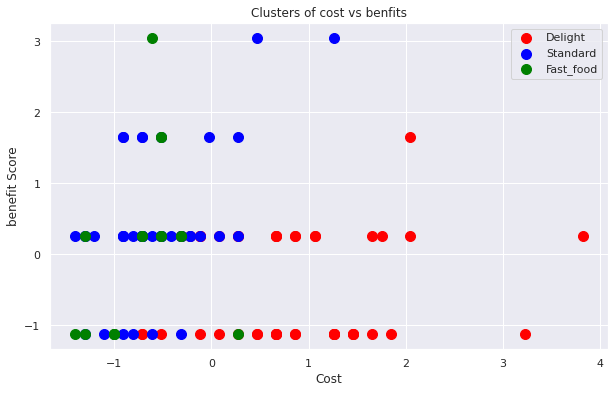

In [76]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Delight')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Fast_food')
plt.title('Clusters of cost vs benfits')
plt.xlabel('Cost')
plt.ylabel('benefit Score')
plt.legend()
plt.show()

#from above Hierarchical cluster plot also gave same result as Kmeans, we can see that on an average Standard category ahs high cost vs benefit. This cluster will help customer to order cuisine which have high benefit.



# Sentiment Analysis (Supervised and UnSupervised )

In [78]:
#storing file_path in a varaible called file_ptah2
file_ptah2 = '/content/drive/MyDrive/ML_Capstone_project/zomato/Zomato Restaurant reviews.csv'

In [79]:
# accessing above dataset in pd and storing it in variable df1
df2 = pd.read_csv(file_ptah2)

In [80]:

df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [81]:
#check the shape of the dataset 2
df2.shape

(10000, 7)

In [82]:
#Describe
df2.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [83]:
#info of df2 dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**We can see that there are some null values, so we'll gonna drop that rows.** 

In [84]:
#Droping null values
df2.dropna(inplace=True)

In [85]:
#after droping null values, 9956 row remain
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [86]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


**Analyzing counts of rating**

In [87]:
#Plot rating counts
df2.Rating.value_counts().sort_index()

1       1735
1.5        9
2        684
2.5       19
3       1192
3.5       47
4       2373
4.5       69
5       3826
Like       1
Name: Rating, dtype: int64

**From the above data we can see that count of 5 star rating is the highest but there is a rating in words which is 'Like' it is an outlier in rating, so we've to first drop that entire column .**

In [88]:
#fine the index of rating where the value is Like
df2[df2.Rating=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [89]:
#Drop the row of index 7601
df2.drop(7601, inplace=True)

In [90]:
df2.Rating = df2.Rating.astype(float)

<Axes: title={'center': 'Count of reviews by star'}>

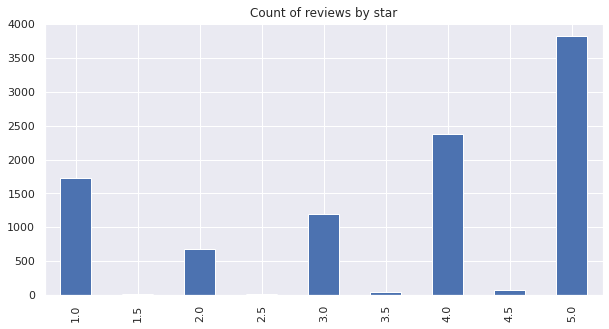

In [91]:
#Plot rating counts
df2.Rating.value_counts().sort_index().plot(kind='bar', title='Count of reviews by star', figsize=(10,5))

In [92]:
df_rating = df2.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

,Rating,number_of_rating
count,100.000000,100.00000
mean,3.601891,99.54000
std,0.508100,2.73924
min,2.400000,77.00000
25%,3.245000,100.00000
50%,3.613081,100.00000
75%,3.846250,100.00000
max,4.880000,100.00000


In [93]:
df_rating.sort_values('Rating',ascending=False).Restaurant[:10]

3                   AB's - Absolute Barbecues
11                                     B-Dubs
2              3B's - Buddies, Bar & Barbecue
67                                   Paradise
35                                   Flechazo
87                             The Indi Grill
97            Zega - Sheraton Hyderabad Hotel
64                 Over The Moon Brew Company
16                            Beyond Flavours
19    Cascade - Radisson Hyderabad Hitec City
Name: Restaurant, dtype: object

#let's plot top 10 restuarant by rating.

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

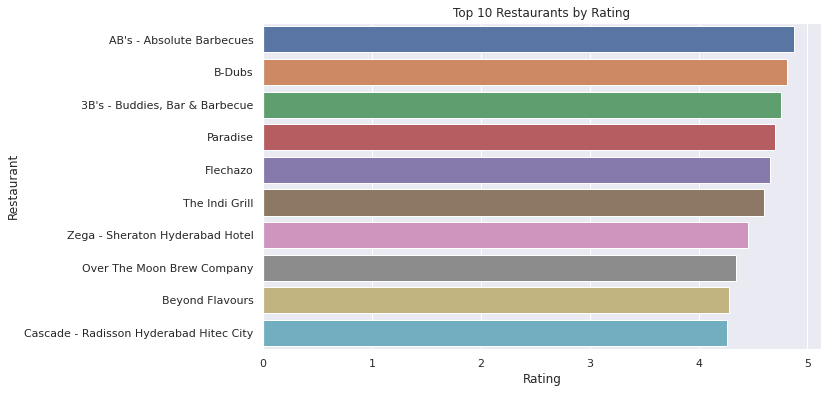

In [94]:
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:10])
plt.title('Top 10 Restaurants by Rating')

**AB's - Absolute Barbecues, B-Dubs, 3B's - Buddies, Bar & Barbecue, Paradise, Flechazo,The Indi Grill, Zega - Sheraton Hyderabad Hotel, Over The Moon Brew Company, Beyond Flavours, Cascade - Radisson Hyderabad Hitec City are top 10 restuarant by rating**

**From the above chart we can see that no of positive reviews are great, which means over all customers are happy with the Resuarants.**

#We need no of reviews of reviewer's but it is in a object form, so we'll extract zeroth value of column Metadata and append it in a list


In [95]:
#Splitting all rows of Metadata by space and appending list in an empty list called review
review = []
for i in df2.Metadata:
  l = i.split(" ")
  review.append(l)



In [96]:
# from list of list we're extracting zeroth value of each list
no_of_review = []
for j in review:
  no_of_review.append(int(j[0]))

In [97]:
#creating a feature called no_of_review and storing list of review in this feature as values
df2['no_of_review'] = no_of_review

#Let's extract the no of follower's of reviewer

In [98]:
#Splitting all rows of Metadata by space and appending list in an empty list called followers
followers= []
for k in df2.Metadata:
  h = k.split(" ")
  followers.append(h)

In [99]:
# from list of list we're extracting third value of each list
no_of_followers = []
for x in followers:
  if len(x)>=3:
    no_of_followers.append(int(x[3]))
  else:
    no_of_followers.append(int(0))

In [100]:
#making new feature no_of_followers and storing list of followers in this feature as values
df2['no_of_followers'] = no_of_followers

In [101]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,no_of_review,no_of_followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2


In [102]:
df2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,no_of_review,no_of_followers
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,472,1302


#Let's reduce some features, as we can see that Metadata and Pictures are no longer need.

In [103]:
#drop unuseful features
df2.drop(columns=['Metadata',	'Time',	'Pictures'], inplace=True)

**As we can see that Rating is in object form, but we want it in int type, so lets convert it in int type.**


In [104]:
#Converting Rating column in float type
df2['Rating'] = df2['Rating'].astype(float)

In [105]:
#Check dtype of Rating
df2.Rating.dtype

dtype('float64')

**Now the Rating column is in foat type, in further data wranggling it will be useful.**

In [106]:
#Analyzing data using groupby on Reviewer , no_of_review, no_of_followers
df2.groupby(['Reviewer','no_of_review'])['no_of_followers'].sum().sort_values(ascending=False)

Reviewer           no_of_review
Satwinder Singh    186             40230
Foodies Hyderabad  31              37976
Srinivas           34              30512
Samar Sardar       8               22658
Food Nawabs        130             22129
                                   ...  
Rajesh Babu        1                   0
Rajesh Bhosale     1                   0
Rajesh Gorli       1                   0
Rajesh Goruntula   1                   0
Md Rabbani         1                   0
Name: no_of_followers, Length: 7806, dtype: int64

In [107]:
df2.reset_index(inplace=True)

In [108]:
#After removing reviewers who reviewed less than 10 times, we left with only 3723 row's.
df2.shape

(9954, 7)

**After removing reviewers who reviewed less than 20 review's, we left with only 2583 row's.**

#Now let's find the critic's in df2 by no of review's and no of follower's

In [109]:
#Analyzing data using groupby on Reviewer , no_of_review, no_of_followers
df2.groupby(['Reviewer','no_of_review'])['no_of_followers'].sum().sort_values(ascending=False)

Reviewer           no_of_review
Satwinder Singh    186             40230
Foodies Hyderabad  31              37976
Srinivas           34              30512
Samar Sardar       8               22658
Food Nawabs        130             22129
                                   ...  
Rajesh Babu        1                   0
Rajesh Bhosale     1                   0
Rajesh Gorli       1                   0
Rajesh Goruntula   1                   0
Md Rabbani         1                   0
Name: no_of_followers, Length: 7806, dtype: int64

In [110]:
#group by Reviewer on no_of_review  and count to find the how many times they have done reviews in this dataset
tp_10_fre_reviewers = df2.groupby('Reviewer')['no_of_review'].count().sort_values(ascending=False)

In [111]:

tp_10_fre_reviewers[:10]

Reviewer
Ankita                            13
Parijat Ray                       13
Kiran                             12
Vedant Killa                      11
Jay Mehta                         11
Manojkumar D Nambisan             10
Sravani                           10
Siva Kumar                        10
Priyanka                          10
Age Of Foodies (Suraj Karambe)    10
Name: no_of_review, dtype: int64

Text(0.5, 0, 'Reviewer')

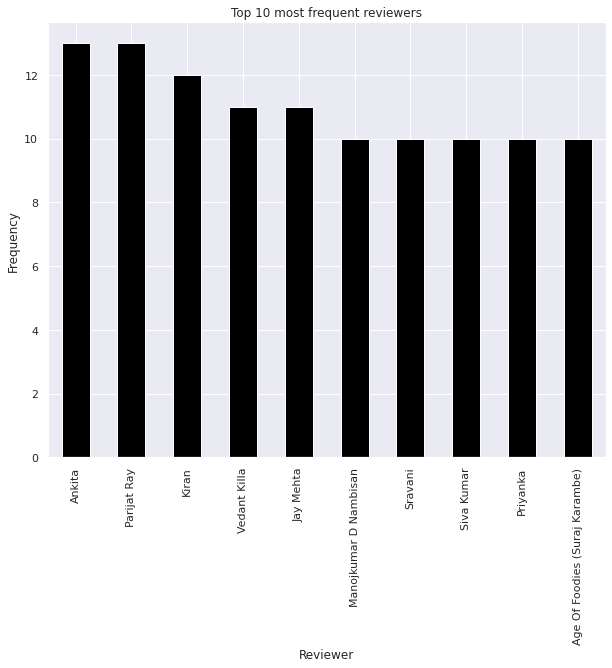

In [112]:
#plot 10 frequent reviewer

plt.rcParams['figure.figsize'] = [10,8]
tp_10_fre_reviewers[:10].sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Top 10 most frequent reviewers')
plt.ylabel('Frequency')
plt.xlabel('Reviewer')



In [113]:
#group by Reviewer on no_of_followers  and sum to find the total no of followers they have
tp_10_reviewers_with_followers = df2.groupby('Reviewer')['no_of_followers'].sum().sort_values(ascending=False)



In [114]:
#Top 10 critics by followers
tp_10_reviewers_with_followers[:10]


Reviewer
Satwinder Singh       40230
Foodies Hyderabad     37976
Srinivas              30514
Samar Sardar          22658
Food Nawabs           22129
ASH&B2                20793
Rohit Reddy           14860
Nishtha Chandarana    14812
Varun Reddy           13959
Eat_vth_me            13320
Name: no_of_followers, dtype: int64

Text(0.5, 0, 'no of followers')

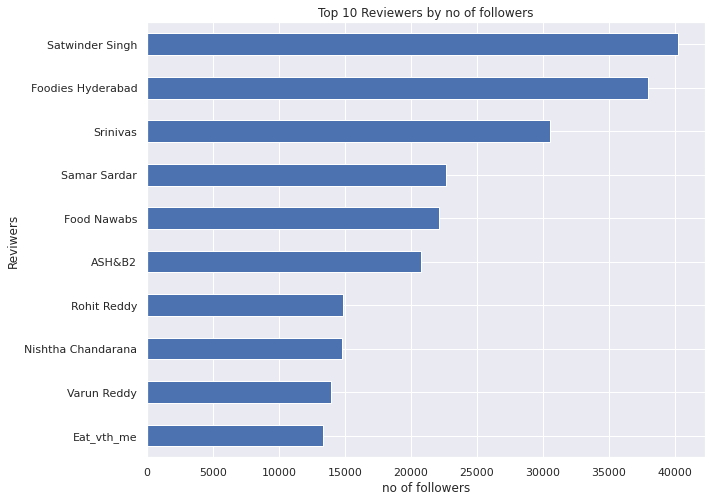

In [115]:

# plotting Top 10 critics by the no of followers
plt.rcParams['figure.figsize'] = [10,8]
tp_10_reviewers_with_followers[:10].sort_values().plot(kind='barh')

plt.title('Top 10 Reviewers by no of followers')
plt.ylabel('Reviwers')
plt.xlabel('no of followers')

**From the chart we can see that Parijat Ray, Vedant Killa, Age Of Foodie(Suraj Karambe), Prachita Jayaswal, Shravya Gunipudi, The Foodie Bookworm, Lakshmi P  , Avin Seth, Charushila Biswas, Moonis Ahmed are the critic's who have reiview more no of times**

#Let's visualize top 10's




#Let's find out top 10 critic's.



In [116]:
#critics by total sum of rating
tp_10_reviewers_with_reviews = df2.groupby('Reviewer')['no_of_review'].sum().sort_values(ascending=False)


In [117]:
tp_10_reviewers_with_reviews[:10]



Reviewer
Anvesh Chowdary         3093
Raghu                   2658
Parijat Ray             1898
Sambhangi Sandeep       1638
Gourmet Hunter          1617
Avin Seth               1576
Shravya Gunipudi        1544
Priyambada Choudhury    1376
Shreshth Malhotra       1375
Epicurean Tales         1356
Name: no_of_review, dtype: int64

Text(0.5, 0, 'total no of reviews')

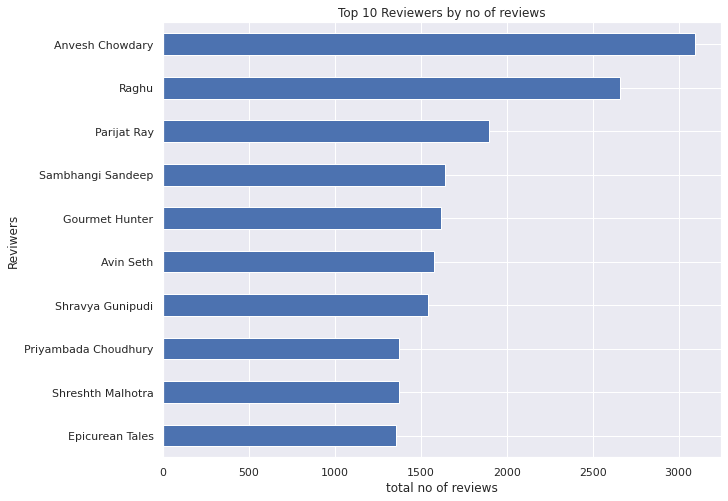

In [118]:
# plotting Top 10 critics by the no of followers
plt.rcParams['figure.figsize'] = [10,8]
tp_10_reviewers_with_reviews[:10].sort_values().plot(kind='barh')

plt.title('Top 10 Reviewers by no of reviews')
plt.ylabel('Reviwers')
plt.xlabel('total no of reviews')

**From above chart we can see that Satwinder Singh, Foodies Hyderabad, Srinivas , Food Nawabs, ASH&B2, Rohit Reddy, Nishtha Chandarana,** **Varun Reddy, Eat_vth_me, Namit Agarwal are the top 10 critics**

#Now let's work on understanding the sentiment of customer through their review's using NLP.

In [119]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [120]:
df2['Review'] = df2['Review'].apply(remove_punctuation)
df2.head(10)

,index,Restaurant,Reviewer,Review,Rating,no_of_review,no_of_followers
0,0,Beyond Flavours,Rusha Chakraborty,The ambience was good food was quite good had...,5.0,1,2
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening Se...,5.0,3,2
2,2,Beyond Flavours,Ashok Shekhawat,A must try great food great ambience Thnx for ...,5.0,2,3
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy Only becau...,5.0,1,1
4,4,Beyond Flavours,Dileep,Food is goodwe ordered Kodi drumsticks and bas...,5.0,3,2
5,5,Beyond Flavours,Nagabhavani K,Ambiance is good service is good food is aPrad...,5.0,1,0
6,6,Beyond Flavours,Jamuna Bhuwalka,Its a very nice place ambience is different al...,5.0,1,0
7,7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,1,0
8,8,Beyond Flavours,Akash Thorat,Excellent food specially if you like spicy fo...,5.0,1,1
9,9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend ...,5.0,1,1


#As rating below 3 means customer is unhappy with the service and food. Rating 3 and above means customer is satisfied with the food and service. So let's encode all rating below 3 as 0, 3 and above as 1. It will be easy to classify the sentiment of review.

#Let's take all rating below 3 as negative, and 3 and above as positive, assign 0 for negative sentiment and 1 for positive sentiment.


In [121]:
sentiment = []
for i in df2.Rating:
  if i < 3:
    i=0
  else:
    i=1
  sentiment.append(i)

In [122]:
df2['sentiment'] = sentiment

In [123]:
df2.tail()

,index,Restaurant,Reviewer,Review,Rating,no_of_review,no_of_followers,sentiment
9949,9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54,1
9950,9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us The food ...,4.5,2,53,1
9951,9997,Chinese Pavilion,Ramandeep,Bad rating is mainly because of Chicken Bone f...,1.5,65,423,0
9952,9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food Had ...,4.0,13,144,1
9953,9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,472,1302,1


In [124]:
#define x and y

X = df2.Review
y = df2.sentiment

In [125]:
X_train, X_test, y_trian, y_test = train_test_split(X,y, random_state=1)

In [126]:
X_train.shape

(7465,)

In [127]:
X_test.shape

(2489,)

#Tokenization

In [128]:
#importing CountVectorizer for text preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
vect = CountVectorizer(ngram_range=(1,1),stop_words='english',lowercase=True,min_df=2)


In [130]:

#Tokenization and vectorization
vect.fit(X_train)

CountVectorizer(min_df=2, stop_words='english')

In [131]:
len(vect.get_feature_names_out())



6627

In [132]:
X_train_dtm = vect.transform(X_train)



In [133]:
X_train_dtm 



<7465x6627 sparse matrix of type '<class 'numpy.int64'>'
	with 152182 stored elements in Compressed Sparse Row format>

In [134]:
type(X_train_dtm)



scipy.sparse._csr.csr_matrix

In [135]:
X_train_dtm.toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [136]:
n_df = pd.DataFrame(X_train_dtm.toarray())
n_df.columns= vect.get_feature_names_out()
n_df.head()



,05,10,100,1000,10000,100s,1010,1012,1030,10d,...,zega,zero,zesty,zillion,zing,zinger,zings,zomato,zone,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test_dtm = vect.transform(X_test)

X_test_dtm



<2489x6627 sparse matrix of type '<class 'numpy.int64'>'
	with 50083 stored elements in Compressed Sparse Row format>

In [138]:
X_test_dtm.toarray()
m_df = pd.DataFrame(X_test_dtm.toarray())
m_df.columns= vect.get_feature_names_out()
m_df.head()

,05,10,100,1000,10000,100s,1010,1012,1030,10d,...,zega,zero,zesty,zillion,zing,zinger,zings,zomato,zone,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
vect =  CountVectorizer(stop_words='english', lowercase=True,min_df=4)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

from sklearn.linear_model import LogisticRegression
nb = MultinomialNB()
nb.fit(X_train_dtm, y_trian)
y_pred_class = nb.predict(X_test_dtm)
print("number of feature")
print(X_train_dtm.shape[1])
print("Trinnig Accuracy")
print(nb.score(X_test_dtm,y_test))
print('Confusion metric')
print(confusion_matrix(y_test, y_pred_class))
print('classification report')
print(classification_report(y_test, y_pred_class))

(7465, 3907)
(2489, 3907)
number of feature
3907
Trinnig Accuracy
0.8975492165528325
Confusion metric
[[ 474  119]
 [ 136 1760]]
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       593
           1       0.94      0.93      0.93      1896

    accuracy                           0.90      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.90      0.90      0.90      2489



#let's use Logistic Regression for classifying the sentiment.

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_dtm, y_trian)
y_pred_class = lr.predict(X_test_dtm)
print("number of feature")
print(X_train_dtm.shape[1])
print("Trinnig Accuracy")
print(lr.score(X_test_dtm,y_test))
print('Confusion metric')
print(confusion_matrix(y_test, y_pred_class))
print('classification report')
print(classification_report(y_test, y_pred_class))

number of feature
3907
Trinnig Accuracy
0.898754519887505
Confusion metric
[[ 439  154]
 [  98 1798]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       593
           1       0.92      0.95      0.93      1896

    accuracy                           0.90      2489
   macro avg       0.87      0.84      0.86      2489
weighted avg       0.90      0.90      0.90      2489



#Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt.fit(X_train_dtm, y_trian)

y_pred_class = dt.predict(X_test_dtm)
print("number of feature")

print(X_train_dtm.shape[1])
print("Trinnig Accuracy")

print(dt.score(X_test_dtm,y_test))
print('Confusion metric')

print(confusion_matrix(y_test, y_pred_class))
print('classification report')

print(classification_report(y_test, y_pred_class))

number of feature
3907
Trinnig Accuracy
0.8272398553635998
Confusion metric
[[ 207  386]
 [  44 1852]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       593
           1       0.83      0.98      0.90      1896

    accuracy                           0.83      2489
   macro avg       0.83      0.66      0.69      2489
weighted avg       0.83      0.83      0.80      2489



#let's use Sentiment analyzer to analyze the over all sentiment of reviews.

In [142]:
#taking value of 1st review
ex = df2['Review'][0]
ex

'The ambience was good food was quite good  had Saturday lunch  which was cost effective \nGood place for a sate brunch One can also chill with friends and or parents\nWaiter Soumen Das was really courteous and helpful'

In [143]:
#download punkt to use word_tokenize module
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [144]:
#tokenizing our ex
tokens = nltk.word_tokenize(ex)
tokens[:5]

['The', 'ambience', 'was', 'good', 'food']

In [145]:
#print the tag's of each word
tag = nltk.pos_tag(tokens)
tag[:5]

[('The', 'DT'),
 ('ambience', 'NN'),
 ('was', 'VBD'),
 ('good', 'JJ'),
 ('food', 'NN')]

**NN = NOUN, JJ = ADJECTIVE, DT = DETERMINER, this all are tag's given to a kind of words**




In [146]:
entity = nltk.chunk.ne_chunk(tag)
entity[:10]

[('The', 'DT'),
 ('ambience', 'NN'),
 ('was', 'VBD'),
 ('good', 'JJ'),
 ('food', 'NN'),
 ('was', 'VBD'),
 ('quite', 'RB'),
 ('good', 'JJ'),
 ('had', 'VBD'),
 ('Saturday', 'NNP')]

#Use Vader Sentiment Scoring.

**We will use NLTK"s SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.**
**For this we'll use bag of words approach.**

In [147]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [148]:
#cheking the sentiment of 1st review.
sia.polarity_scores('The ambience was good, food was quite good . had Saturday lunch , which was cost effective .Good place for a sate brunch. One can also chill with friends and or parents.Waiter Soumen Das was really courteous and helpful.')

{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.9664}

**Through compound score we can see that it is positive comment.**

In [149]:
#The sentiment of this review is negative, let's see what poarity score of SentimentIntensityAnalyzer() shows.
df2.Review[14]

'We ordered corn cheese balls manchow soup and paneer shashlik sizzler The sizzler was stale Paneer was smelling and the waiter was so impolite to even accept the mistake Never going again'

In [150]:
sia.polarity_scores(df2.Review[14])

{'neg': 0.154, 'neu': 0.776, 'pos': 0.07, 'compound': -0.4882}

**The algorithm is working very well is it capturing the sentiment of reviews. Through compound score we can see that it is negative comment**

#Run SentimentAnalyzer() on entire Review feature.

In [151]:
#Running the polarity score on entire df2['Review']
res = []
for i, row in tqdm(df2.iterrows(), total=len(df2)):
  text = row['Review']
  p = sia.polarity_scores(text)
  res.append(p)


  0%|          | 0/9954 [00:00<?, ?it/s]

In [152]:
#converting list of res into dataframe and store it in a variable
vaders = pd.DataFrame(res)
#make a feature rating in vaders and store the values of df2 Rating as values
vaders['rating'] = df2['Rating']

In [153]:
#print first 5 rows of vaders
vaders.head()

,neg,neu,pos,compound,rating
0,0.0,0.582,0.418,0.9664,5.0
1,0.0,0.554,0.446,0.9360,5.0
2,0.0,0.684,0.316,0.9186,5.0
3,0.0,0.708,0.292,0.8591,5.0
4,0.0,0.609,0.391,0.9201,5.0


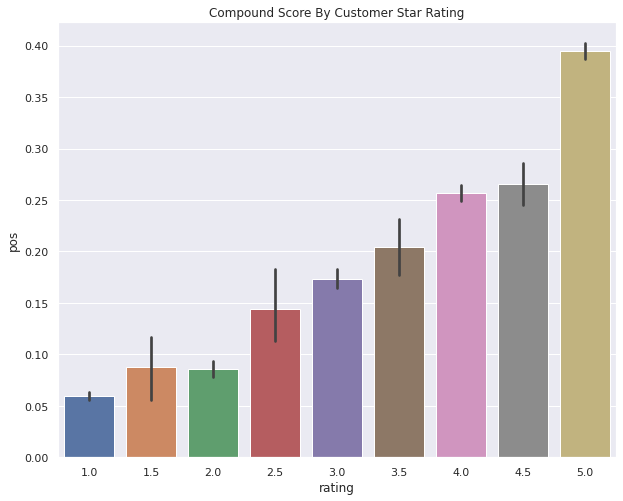

In [154]:
#use sns plot to visaulize the sentiment

ax = sns.barplot(data=vaders, x='rating', y='pos')
ax.set_title('Compound Score By Customer Star Rating')
plt.gcf().set_size_inches(10,8)
plt.show()

**From above chart we can see that as the no of rating increase it tends to positive sentiment. And from the chart we can see that 5 rating is has most positive sentments.**

#Conclusion: Overall rating and sentiment is good customers are happy with zomato's service.



*   In EDA part found out:



1.   Top 10 resturant by rating.

2.   Top 10 resturant by critics.

3.   Top 10 resturant by Cost.

4.   Top 10 Critics by follower.

5.   Top 10 Critics by reviews.

6.   Cost of fast foods is very low.

7.   The cost vs benefit of Standard restuarant is high and Delight restuarant is low.

8.  Through NLP we found that higher the rating, positive is the sentiment and lower the rating, negative is the sentiment. 


#Conclusion from above data wrangling, that this top 10 critic's by follower are very important, b'coz they have follower and people trust thier reviews and rating. So a Restuarant can call this critic's and can colaborate with them to promote thier restuarant on Zomato and on their blogs. Which will increase the trust among new customers and bring them more revenue.

#For clustering the restuarant both we can use both model as the clsuter of both models is same.  

.

#**Summary of the Models**

In [188]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name", "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ","3"]) 
myTable.add_row(['2',"K-Means with Elbow methods", "3"])
myTable.add_row(['3',"Agglomerative clustering with Dendogram", "3"])
print(myTable)

+--------+-----------------------------------------+---------------------------+
| SL No. |                Model_Name               | Optimal_Number_of_cluster |
+--------+-----------------------------------------+---------------------------+
|   1    |      K-Means with silhouette_score      |             3             |
|   2    |        K-Means with Elbow methods       |             3             |
|   3    | Agglomerative clustering with Dendogram |             3             |
+--------+-----------------------------------------+---------------------------+


In [189]:
myTable = PrettyTable(['SL No.',"Model_Name", "0-neg_senti: Precision, recall, f1 score", "1-posi_senti: Precision, recall, f1 score"]) 
  
# Add rows 
myTable.add_row(['1',"NaiveBayes Multinomial","               0.78,     0.80,    0.79", "        0.94,       0.93,     0.93"]) 
myTable.add_row(['2',"Lgistic Regression", "               0.82,    0.74,   0.78", "         0.92,      0.95,    0.93"])
myTable.add_row(['3',"Decision Tree", "                0.82,    0.74,   0.78", "          0.92,      0.95,     0.93"])
print(myTable)

+--------+------------------------+------------------------------------------+-------------------------------------------+
| SL No. |       Model_Name       | 0-neg_senti: Precision, recall, f1 score | 1-posi_senti: Precision, recall, f1 score |
+--------+------------------------+------------------------------------------+-------------------------------------------+
|   1    | NaiveBayes Multinomial |                 0.78,     0.80,    0.79  |             0.94,       0.93,     0.93    |
|   2    |   Lgistic Regression   |                  0.82,    0.74,   0.78   |              0.92,      0.95,    0.93     |
|   3    |     Decision Tree      |                  0.82,    0.74,   0.78   |              0.92,      0.95,     0.93    |
+--------+------------------------+------------------------------------------+-------------------------------------------+


#In this project we've final NaiveBayes model for understanding the sentiment, b'coz it's f1 score is 79% and here model f1 score is important. f1 score is the final metric we're taking into account